# Estudio del alquiler de la vivienda en Madrid y como afecta las viviendas vacacionales

## Contenido

- [Introducción](#Introducción)
- [Hipótesis iniciales](#Hipotesis-inicales)
- [Webscraping Idealista](#Webscraping-Idealista)
- [Limpieza de los datos](#Limpieza-de-los-datos)
- [Análisis de los datos](#Análisis-datos)
- [Mapas alquiler frente vivienda vacacional](#Mapas)
- [Valoracion del alquiler en Madrid](#Valoración-alquiler-Madrid)
- [Conclusiones finales](#Conclusiones)

## Introducción

Antes de comenzar en análisis de nuestros datos, el origen de estos es el siguente:
1. [Idealista](https://www.idealista.com/): Hemos webscrapeado su pagina web para sacar viviendas en alquiler en Madrid para poder realizar su estudio.
2. [INE](https://www.ine.es/index.htm): La web de ´Institucion Nacional de Estadística´ para sacar datos medios sobre los alquileres,renta media de la Comunidad de Madrid.
3. [DataMarket](datamarket.es) : web donde hemos sacado el dataset de viviendas vacacionales en España.

## Hipotesis iniciales

- Un breve estudio sobre el alquiler en Madrid y contrastandolo con datos de la paginas idealista con datos actuales
- Comparar estos análisis con los alquileres de viviendas vacacionales

# Webscraping-Idealista
Primero para optener los datos actuales del mercado, para ser realista con los análisis hemos realizado webcraping de la página web de idealista, como es una página bastante conocida solo he podido recuperar un numero limitado de datos antes de se activara su Firewall pero son datos suficientes para realizar el estudio.

El proceso ha sido durante varios días, ya que al día solo podia recoger unos 30-60 registros pero se realiza con Selenium para entrar en la página y con Beatiful Soup para recoger la información. Hemos webscrapeado con Firefox ya que es mucho más sencillo que con Chrome, si quieres ver el proceso de webscrap, [aqui hay mas información.](src/notebooks/web_scraping/webscrap_idealista.ipynb)



## Limpieza de los datos

Hemos limpiado y estandarizado los datos para adaptarlos todo al mismo formato, para ello hemos realizado dos funciones diferentes. Como cada día ibamos añadiendo más información lo he encapsulado en dos funciones, una para limpiar y otra para estandarizar, si deseas sabes mas, [aquí hay mas información](src/notebooks/analytic/clear_csv.ipynb).

## Análisis de los datos


Antes de analizar nada añadimos las librerias para analizar los dataset y datos que hemos recopilado:

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Añadimos el csv con los datos que hemos webscrapeado de idealista y hemos limpiado y estandarizado:

In [15]:
df_idealista = pd.read_csv("src/data/rentaMadrid2023Idealista.csv", sep=";")
df_idealista.head(5)

Direction   Price    m2  Floor  \
0                              Piso en Goya, Madrid   1500.0  91.0      2   
1         Piso en calle de Belice, Salvador, Madrid   1150.0  78.0      0   
2      Piso en calle Beasain, 31, Orcasitas, Madrid    790.0  68.0      3   
3   Piso en calle de Oña, Virgen del Cortijo - Ma...  1000.0  40.0      0   
4   Piso en batalla del Salado, 44, Delicias, Mad...  1400.0  71.0      2   

   Room                                        Description  
0     2   MARIO INMOBILIARIA OFRECE INMUEBLE PARA CONCE...  
1     2   -ZONA SALVADOR- Piso reformado de 78m² constr...  
2     1   Piso de 1 dormitorio +TRASTERO + GARAJE con t...  
3     1   - SANCHINARRO-Vivienda de 39 m² útiles, exter...  
4     1   Alquilo apartamento grande de una habitación,...

Vamos a ver los información básica del dataframe:

In [14]:
df_idealista.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Direction    412 non-null    object 
 1   Price        412 non-null    float64
 2   m2           386 non-null    float64
 3   Floor        412 non-null    int64  
 4   Room         412 non-null    int64  
 5   Description  406 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 19.4+ KB


En la siguiente tabla podemos observar ya datos importantes:
- El precio medio de un alquiler en Madrid es **2147.66€** y que la desviación estandar es **1621.92**.
- Los m² medios son de **113.93m²** y su desviación estandar es de **95.42**.

In [16]:
df_idealista.describe()

Price           m2       Floor        Room
count    412.000000   386.000000  412.000000  412.000000
mean    2147.660194   113.968912    3.383495    2.186893
std     1621.926886    95.427563    3.723212    1.230798
min      630.000000    26.000000    0.000000    0.000000
25%     1145.000000    65.000000    1.000000    1.000000
50%     1550.000000    85.000000    2.000000    2.000000
75%     2762.500000   130.000000    4.000000    3.000000
max    14500.000000  1024.000000   22.000000    8.000000

También vamos a analizar la moda ya que nos va a dar un valor más acertado ya que las desviaciones estandar son muy elevadas:

In [34]:
df_mode = df_idealista.loc[:,"Price":"Room"].mode().T
df_mode.rename(columns={0: "Mode"}, inplace=True)
df_mode

Mode
Price  1500.0
m2       60.0
Floor     2.0
Room      2.0

Vemos que el precio más repetido es **1500€** y los m² es **60m²**. En el siguiente grafico observamos estas desviaciones ya que el pico de precio esta a la izquierda.

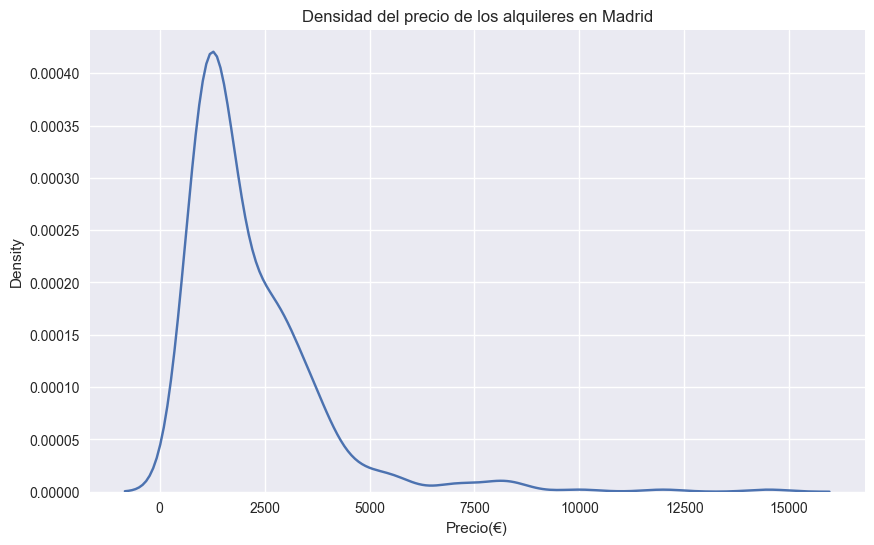

In [37]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_idealista["Price"]);
plt.title("Densidad del precio de los alquileres en Madrid");
plt.xlabel("Precio(€)");

También vamos a realizar una analítica referente al numero de habitaciones, numero de piso los m² y el precio:

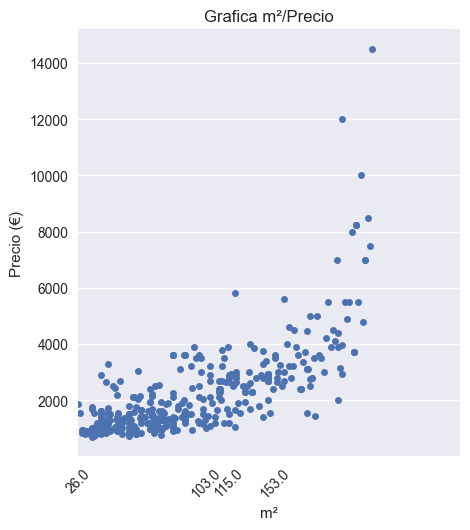

In [39]:
df_m2 = df_idealista["m2"].describe(percentiles=[0,.15,.25,.5,.75,.85])
sns.catplot(df_idealista, x='m2', y='Price', kind="strip");
plt.xlim([0, df_m2["75%"]])
plt.xticks(rotation=45,ticks=[0,df_m2["15%"],df_m2["25%"], df_m2["50%"],df_m2["75%"], df_m2["85%"]]);
plt.title("Grafica m\u00B2/Precio");
plt.ylabel("Precio (€)");
plt.xlabel("m²");

La cual observamos que el precio aumenta exponencialmente respecto a los m² lo cual es esperable, cuanto mayor es el tamaño de la casa mas alto es su alquiler.

Vamos a profundizar en este gráfico y vamos a añadir las variables de numero de habitaciones y piso para ver como influyen.

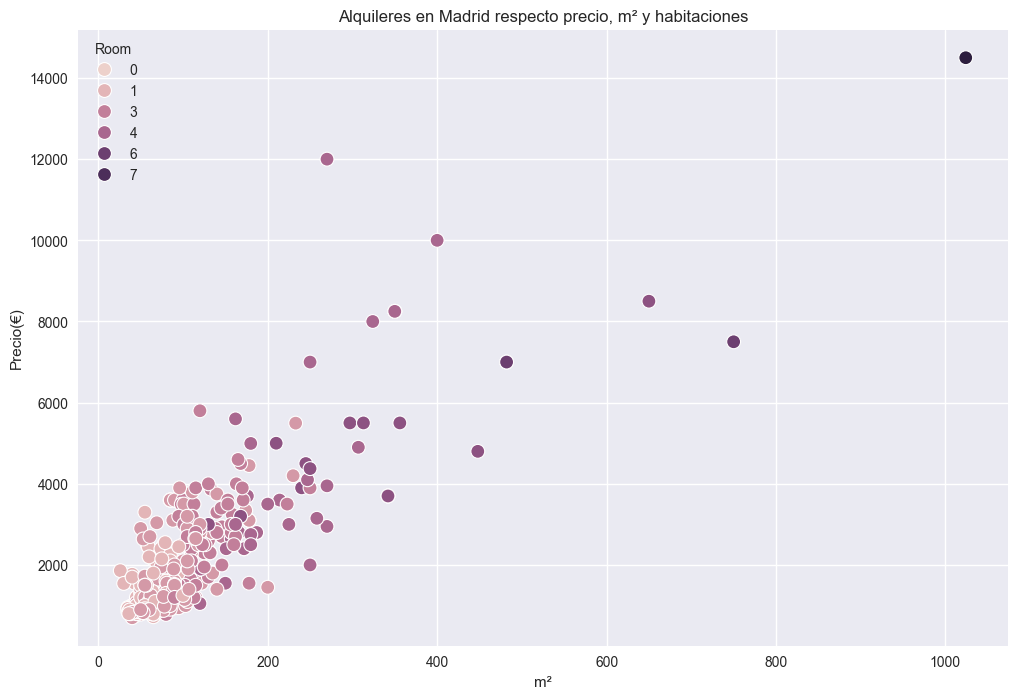

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_idealista['m2'],
                y=df_idealista['Price'],
                hue = df_idealista['Room'],
               s=100);
plt.title("Alquileres en Madrid respecto precio, m\u00B2 y habitaciones");
plt.xlabel("m\u00B2");
plt.ylabel("Precio(€)");

Podemos observar que la zona más clara, el numero menor de habitaciones de la vivienda, siendo 0 un estudio, vemos que estan abajo a la izquierda siendo más baratos, ya que tienen menos m² por lo que su precio es menor. Vemos al contrario que se osurece más (más habitaciones) segun mas m² tenga y su precio también aumenta.

Vamos a observar la correlación en nuestros datos con un mapa de calor, para ver como influyen estos valores unos con otros para ver si nuestras conclusiones anteriores son acertadas.

In [45]:
df_corr = df_idealista.loc[:,"Price":"Room"].corr()
df_corr

Price        m2     Floor      Room
Price  1.000000  0.829201  0.258216  0.652120
m2     0.829201  1.000000  0.252155  0.758823
Floor  0.258216  0.252155  1.000000  0.197232
Room   0.652120  0.758823  0.197232  1.000000

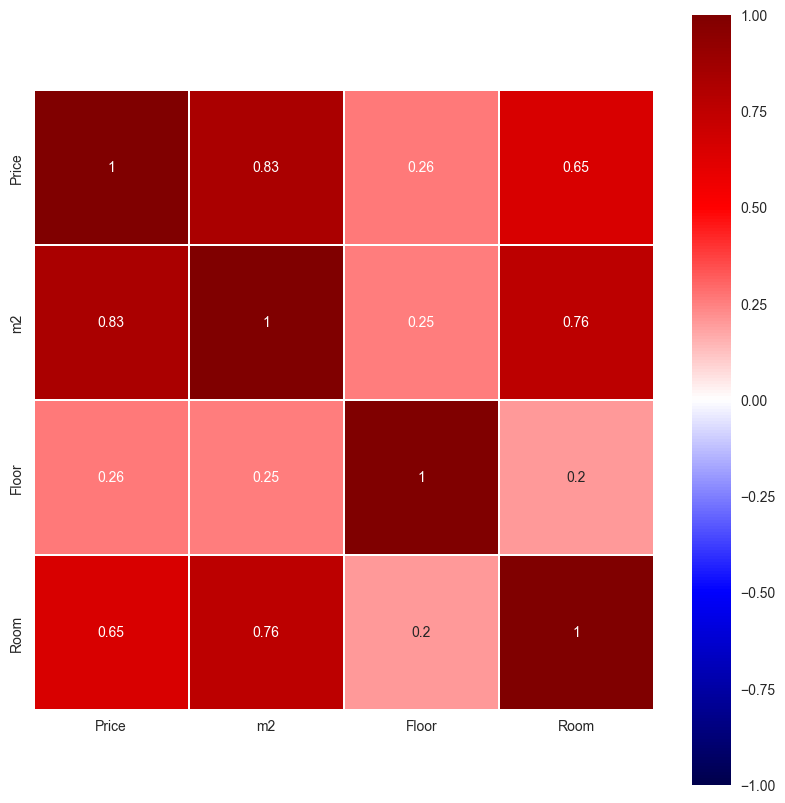

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,
            vmin=-1,
            vmax=1,
            cmap="seismic",
            square=True,
            linewidths=.1,
            annot=True);

Analicemos los resultados:
- Como hemos dicho anteriormente, nuestras variables precio y m² tienen un alto grado de correlación un **0.83**.
- También tiene una correlación alta la variable numero de habitaciones y m² un **0.76**, lo cual es lógico ya que necesitas más m² cuantas mas habitaciones haya.
- Y por ultimo una correlación mas bajita por cuantas más habitaciones haya mayor precio, lo cual es lógico ya que las habitaciones y el m² estan relacionadas.

Por ultimo para verlo de manera más visual vamos a usar la librería plotly para ver estas correlaciones y este gráfico respescto también al piso para hacer un estudio más exhaustivo.

In [47]:
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px


In [50]:
fig = px.scatter_matrix(df_idealista,
    dimensions=["Price", "m2", "Floor"],
    color="Room",
    title="Correlaciones de precio, m² y piso de los alquileres en Madrid por habitaciones",
)
fig.show()

Por ultimo haremos el grafico donde relacionaremos todas nuestras variables:

In [53]:

floor = [int(m) for m in df_idealista[df_idealista["Floor"].notna()]["Floor"]]

data = [
    {
        'x': df_idealista['m2'],
        'y': df_idealista['Price'],
        'mode': 'markers',
        'marker': {
            'color': df_idealista['Room'],
            'size': floor,
            'showscale': True
        },
        'text': df_idealista['Direction'],
    }
]

layout = go.Layout(
    title="Análisis de los alquileres por precio, m2, habitaciones y piso",
        xaxis=dict(
        title="m2"
    ),
    yaxis=dict(
        title="Price (€)"
    ) 
)


iplot({'data':data, 'layout': layout})

## Mapas

Vamos ahora a analizar nuestros alquileres que tenemos en nuestro Dataframe de idealista con el Dataframe de viviendas vacacionales, para ello vamos usar la librería Folium. Esta librería nos permite pintar en mapas datos lo cual nos es muy util para poder localizar las viviendas de nuestros dataframes y hacer mapas de calor entre otras.

También vamos a importar geocoder para poder sacar la latitud y longitud de las viviendas de Idealista ya que no tenemos las coordenadas. 
Vamos a importar las siguientes librerias:

In [55]:
import folium # pip install folium
from folium import plugins
import ipywidgets # pip install ipywidgets
import geocoder # pip install geocoder
import geopy # pip install geopy
import branca.colormap as cm
import webcolors

Añadimos nuestro Dataset de viviendas vacacionales y lo estandarizamos:

In [87]:
df_holidays = pd.read_csv("src/data/alojamientos-turisticos-sample.csv")
df_hol_mad = df_holidays[df_holidays["city"].str.contains("madrid")]
df_hol_mad = df_hol_mad.head(100)
df_hol_mad.reset_index(inplace=True)
df_hol_mad.drop(axis=1, columns="index", inplace=True)
df_hol_mad_final = df_hol_mad[["apartment_id","name","neighbourhood_district", "latitude", "longitude", "insert_date"]]
df_hol_mad_final.head(5)

apartment_id                                              name  \
0      39982406     LUXURY 5 BEDROOM APARTMENT IN MONCLOA-ARAVACA   
1      19344018                            Habitación zona Atocha   
2      30808704  Habitación en Madrid! <<Wifi>>Perfecto para 2!!!   
3      23409834                 HABITACIÓN EN BARRIO DE SALAMANCA   
4       1254955                 Madrid Central flat - Reina Sofía   

  neighbourhood_district  latitude  longitude insert_date  
0      Moncloa - Aravaca  40.46614  -3.809480  2020-01-10  
1             Arganzuela  40.40507  -3.693183  2019-01-14  
2            Carabanchel  40.38349  -3.748070  2020-10-17  
3              Salamanca  40.43442  -3.675620  2019-05-14  
4             Arganzuela  40.40373  -3.695030  2019-09-19

In [88]:
df_hol_mad_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   apartment_id            100 non-null    int64  
 1   name                    100 non-null    object 
 2   neighbourhood_district  100 non-null    object 
 3   latitude                100 non-null    float64
 4   longitude               100 non-null    float64
 5   insert_date             100 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


Vamos a añadir nuestro dataset de idealista donde hemos calculado la longitud y latidud de nuestras viviendas en idealista, si quieres ver como se realiza, [aquí esta el código de como hacerlo](src/notebooks/analytic/idealista_analytic.ipynb)

In [89]:
df_dir_mad = pd.read_csv("src//data/rentaMadridDatosLimpios.csv", sep=";")
df_dir_mad.drop(columns="Unnamed: 0", axis=1, inplace=True)
df_dir_mad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Direction    113 non-null    object 
 1   Price        113 non-null    float64
 2   m2           113 non-null    float64
 3   Floor        113 non-null    int64  
 4   Room         113 non-null    int64  
 5   Description  113 non-null    object 
 6   N_direction  113 non-null    int64  
 7   Street       113 non-null    object 
 8   City         113 non-null    object 
 9   lat          113 non-null    float64
 10  lng          113 non-null    float64
dtypes: float64(4), int64(3), object(4)
memory usage: 9.8+ KB


Una vez tenemos nuestras Dataframes con nuestras latitudes y longitudes vamos a crear el mapa posicionado en Madrid:

In [100]:
map_mad = folium.Map(location=[40.4567, -3.6840],
                 zoom_start=12,
                 control_scale=True)
map_mad

Vamos a añadir las siguientes marcas:
- Delimitación de los barrios de Madrid:

In [101]:
holiday_group = folium.FeatureGroup("Holiday Rents Mad")

style = {'fillColor': 'gray', "fillOpacity": 0.5}
folium.GeoJson('src/data/LímitesdelosBarriosAdministrativosdeMadrid.geojson',
                name='Neighborhood Delimitation Madrid',
                style_function = lambda x:style).add_to(map_mad)

- Viviendas Vacacionales con marcadores en **gris**:

In [102]:
# group fo holidays rent locations madrid
holiday_group = folium.FeatureGroup("Holiday Rents Mad")

# plot holiday rents madrid locations
for (index, row) in df_hol_mad_final.iterrows():
    try:
        addr_lat = row["latitude"]
        addr_lng = row["longitude"]
        # add marker summer rents to map
        holiday_group.add_child(folium.Marker(location = [addr_lat, addr_lng],
                    popup = row["neighbourhood_district"] + ' ' + row['name'],
                    tooltip = 'click',
                    icon=folium.Icon(icon="glyphicon-home", prefix='glyphicon', color ="gray")))
    except:
        print(row["apartment_id"])

- Viviendas en alquiler con colores descriptivos del precio, separado por los percentiles de la siguiente manera:

In [103]:
# colors of rent/price
df_price_rent = pd.DataFrame({"describe:": df_dir_mad["Price"].describe(percentiles=[.1,.25,.5,.75,.9])});
colormap = cm.StepColormap(colors=['green','orange','pink','purple', 'red'],
                           index=[df_price_rent.loc["10%"][0],
                                  df_price_rent.loc["25%"][0],
                                  df_price_rent.loc["50%"][0],
                                  df_price_rent.loc["75%"][0],
                                  df_price_rent.loc["90%"][0]], 
                           vmin= df_price_rent.loc["min"][0],
                           vmax= df_price_rent.loc["max"][0]
                        );
colormap

In [104]:
# group fo holidays rent locations madrid
rents_group = folium.FeatureGroup("Rents Mad")
place  = ""

for (index, row) in df_dir_mad.iterrows():
    try:
        addr_lat = row.loc["lat"]
        addr_lng = row.loc["lng"]
        # add marker to map
        rents_group.add_child(folium.Marker(location = [addr_lat, addr_lng],
                    popup = place + ' ' + str(row['Price']) + '€, ' + str(row['m2']) + "m\u00B2",
                    tooltip = 'click',
                    icon=folium.Icon(
                        icon="glyphicon-home",
                        color=webcolors.rgb_to_name(colormap.rgb_bytes_tuple((row.loc["Price"]))),
                        prefix='glyphicon'
                    )
            )
        )
        # Add the marker to the existing map
    except:
        print(place)

- HeatMaps de la distribución de las viviendas de alquiler:


In [105]:
# HeatMap for rents prices
heatmap_rent = folium.FeatureGroup("Heat Map Rents Mad")
rents_heat_data=list(zip(df_dir_mad.lat, df_dir_mad.lng))
heatmap_rent.add_child(folium.plugins.HeatMap(rents_heat_data));

- HeatMaps de la distribución de las viviendas vacacionales:

In [106]:
# HeatMap for holiday rents prices
heatmap_hol = folium.FeatureGroup("Heat Map Holiday Rents Mad")
hol_rents_heat_data=list(zip(df_hol_mad_final.latitude, df_hol_mad_final.longitude))
heatmap_hol.add_child(folium.plugins.HeatMap(hol_rents_heat_data));

-Añadimos los marcadores y los grupos al mapa:

In [107]:
# add groups madrid map
map_mad.add_child(rents_group)
map_mad.add_child(holiday_group)
map_mad.add_child(heatmap_rent)
map_mad.add_child(heatmap_hol)
 # # add layer control to map (allows layer to be turned on or off)
map_mad.add_child(folium.LayerControl().add_to(map_mad))

# display map
display(map_mad)

Y nos muestra todos los grupos que hemos añadido, vamos a verlo de uno en uno:
- Delimitación de los barrios de Madrid:

In [108]:
map_mad

- Viviendas vacacionales:

In [109]:
map_mad

- Mapa de calor de las viviendas vacacionales:

In [110]:
map_mad

Por lo que vemos se concentran en la zona centro de Madrid, ya que son donde el turismo desea alojarse.

- Pisos alquiler:

In [111]:
map_mad

Podemos apreciar que cuanto más lejos del centro, más se reducen los costos, podemos apreciar que la zona de salamanca es donde están los alquileres más elevados.

- Mapa de calor de los pisos de alquiler:

In [112]:
map_mad

Donde apreciamos que se distribuyen mas homogeneamente por la zona de Madrid, tirando a centrico. También observamos que la zona Centro donde hay más viviendas vacacionales hay una ausencia de pisos de alquiler.

Por último he realizado un estudio de como ha evolucionado con el tiempo la llegada de las viviendas vacacionales, para ello vamos a ver un mapa de calor por tiempo y vamos a observar el aumento de viviendas de alquiler en los ultimos años, lo que vamos a compararlo con el grafico de tiempo de la evolución del alquiler en Madrid estraido del INE:

In [124]:
df_hol_mad_all = df_holidays[df_holidays["city"].str.contains("madrid")]

In [125]:
df_hol_mad_all["latitude_longitude"] = [str(row["latitude"]) +", "+ str(row["longitude"]) for (index, row) in df_hol_mad_all.iterrows()]
df_hol_mad_all['insert_date'] = df_hol_mad_all['insert_date'].str.replace("-","/")
df_date_latlng = df_hol_mad_all.groupby('insert_date').agg({"latitude_longitude": 'sum'})

#Logic of acumulative coords

lat_long_list = []
for i in df_date_latlng.index:
    temp= []
    for index, instance in df_hol_mad_all[df_hol_mad_all["insert_date"] == i].iterrows():
        temp.append([instance['latitude'],instance['longitude']])
    lat_long_list.append(temp)
    lat_long_list_aux= []
lat_long_list_aux = lat_long_list.copy()

for i,n in enumerate(lat_long_list):
    if i== 0: 
        pass
    else:
        for x_n in lat_long_list[i-1]:
            lat_long_list_aux[i].append(x_n)

# heat map over time

heatmap_time_dates = df_hol_mad_all["insert_date"].sort_values().to_list()

# map
map_heatmap_time = folium.Map(location=[40.4567, -3.6840],
                 zoom_start=12,
                 attr="Stadia.AlidadeSmoothDark",        
                #  width=700,
                #  height=500,
                 control_scale=True)

# heatmap plugin
plugins.HeatMapWithTime(lat_long_list_aux,
                        index = df_date_latlng.index.to_list(),
                        radius=5,
                        gradient={0.1: 'blue', 0.25:'green', 0.5:'yellow', 0.75:'orange', 1:'red'}).add_to(map_heatmap_time)

# display map
map_heatmap_time

Y la evolución del precio de alquiler medio:

In [129]:
mad_rent = pd.read_csv("src/data/evolucionpreciomediolimpio.csv", sep=";")
df_2mean = mad_rent[mad_rent["madrid"].notna()].groupby("anno")["madrid"].describe()
df_2mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2007 to 2018
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   12 non-null     float64
 1   mean    12 non-null     float64
 2   std     12 non-null     float64
 3   min     12 non-null     float64
 4   25%     12 non-null     float64
 5   50%     12 non-null     float64
 6   75%     12 non-null     float64
 7   max     12 non-null     float64
dtypes: float64(8)
memory usage: 864.0 bytes


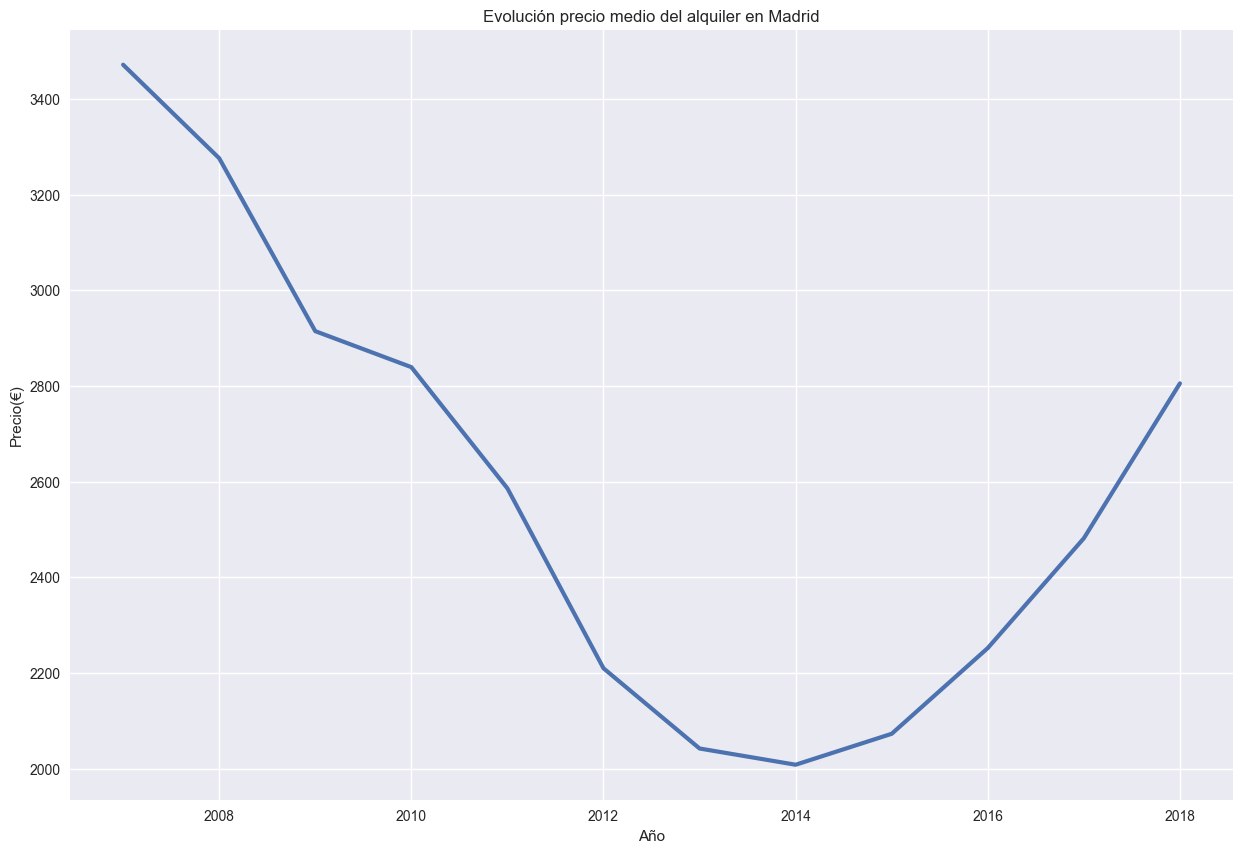

In [130]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_2mean,
             x="anno",
             y="mean",
            linewidth = 3);
plt.title("Evolución precio medio del alquiler en Madrid");
plt.xlabel("Año");
plt.ylabel("Precio(€)");

No podemos demostrar que ha subido ya que no disponemos de los datos críticos del aumento de las viviendas vacacionales, por lo que la hipotesis no he podido demostrarla pero si puedo realizar las siguientes valoraciones.

## Valoración alquiler de Madrid

Lo que nos da a entender el análisis de los datos es:
- Cuanto mayor es el m² mayor es el precio.
- Cuanta más habitaciones tiene mayor es el m².
- El numero de piso no es una variable que afecte al precio.
- Los barrios centrícos son más caros que los exteriores.
- Donde hay una concentracion de viviendas de alquiler hay muchos menos alquileres.
- Se demuestra el aumento de las viviendas vacaciones en Madrid en los ultimos 5 años.

## Conclusiones

# Siguientes pasos